In [ ]:
%matplotlib inline

# Compute co-occurrence probability

This example shows how to compute the co-occurrence probability.

The co-occurrence score is defined as:

$$\frac{p(exp|cond)}{p(exp)}$$

where $p(exp|cond)$ is the conditional probability of observing a
cluster $exp$ conditioned on the presence of a cluster $cond$, whereas
$p(exp)$ is the probability of observing $exp$ in the radius size of
interest. The score is computed across increasing radii size around each
cell in the tissue.

::: seealso
See `sphx_glr_auto_examples_graph_compute_ripley.py` for another score
to describe spatial patterns with `squidpy.gr.ripley`.
:::


In [1]:
import squidpy as sq

adata = sq.datasets.imc()
adata

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1.50M/1.50M [00:05<00:00, 307kB/s]


AnnData object with n_obs × n_vars = 4668 × 34
    obs: 'cell type'
    uns: 'cell type_colors'
    obsm: 'spatial'

We can compute the co-occurrence score with `squidpy.gr.co_occurrence`.
Results can be visualized with `squidpy.pl.co_occurrence`.


/opt/miniconda3/envs/squidpy/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:08<00:00,  8.71s/]


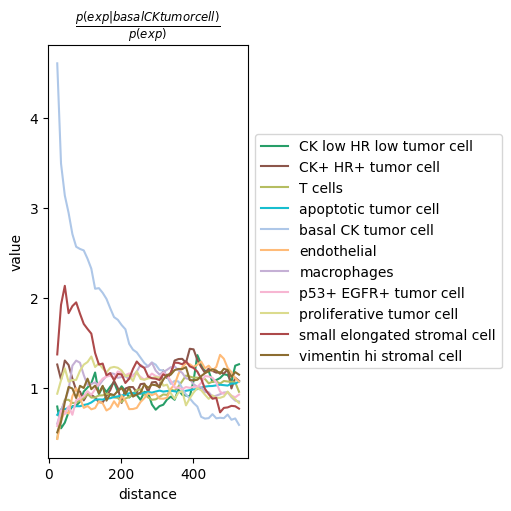

In [2]:
sq.gr.co_occurrence(adata, cluster_key="cell type")
sq.pl.co_occurrence(adata, cluster_key="cell type", clusters="basal CK tumor cell")

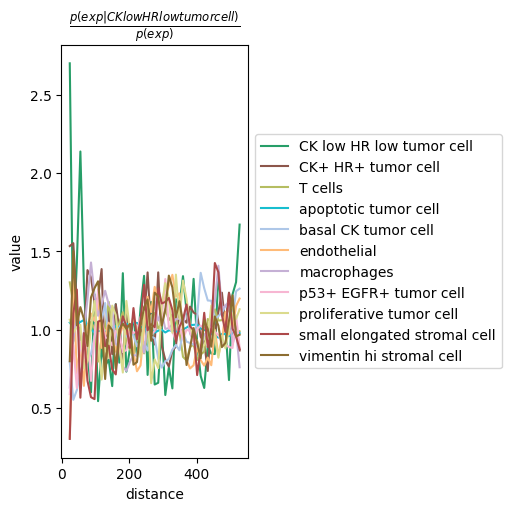

In [50]:
sq.pl.co_occurrence(adata, cluster_key="cell type", clusters="CK low HR low tumor cell")

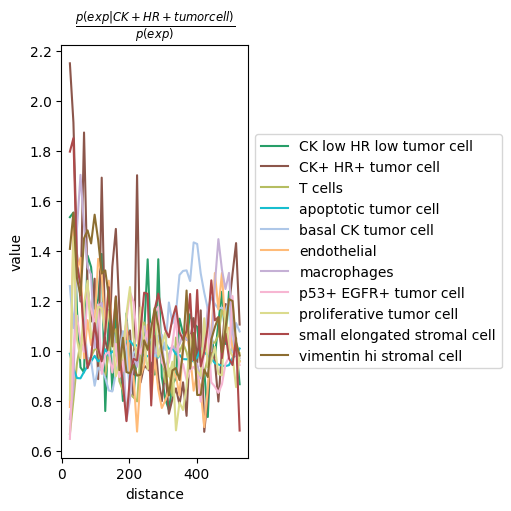

In [51]:
sq.pl.co_occurrence(adata, cluster_key="cell type", clusters="CK+ HR+ tumor cell")

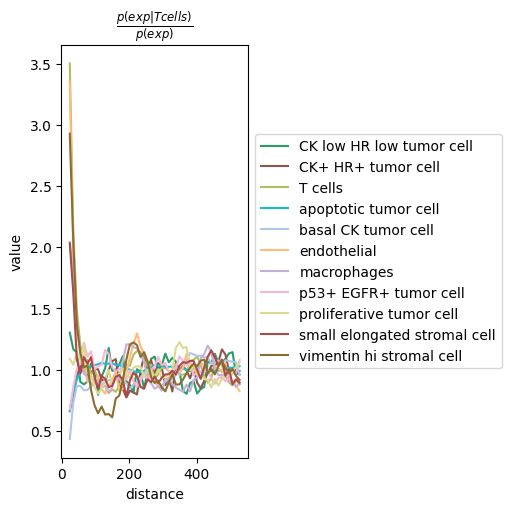

In [52]:
sq.pl.co_occurrence(adata, cluster_key="cell type", clusters="T cells")

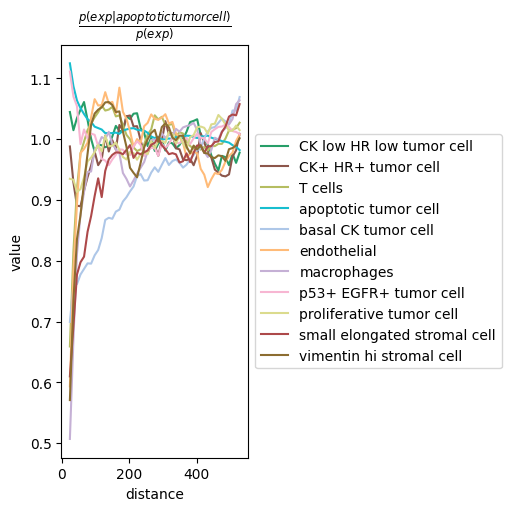

In [53]:
sq.pl.co_occurrence(adata, cluster_key="cell type", clusters="apoptotic tumor cell")

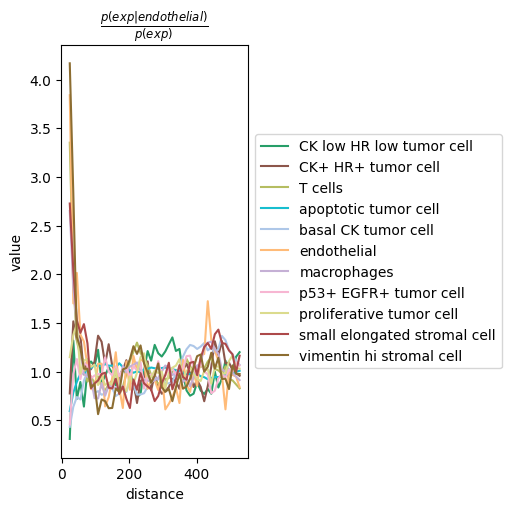

In [54]:
sq.pl.co_occurrence(adata, cluster_key="cell type", clusters="endothelial")

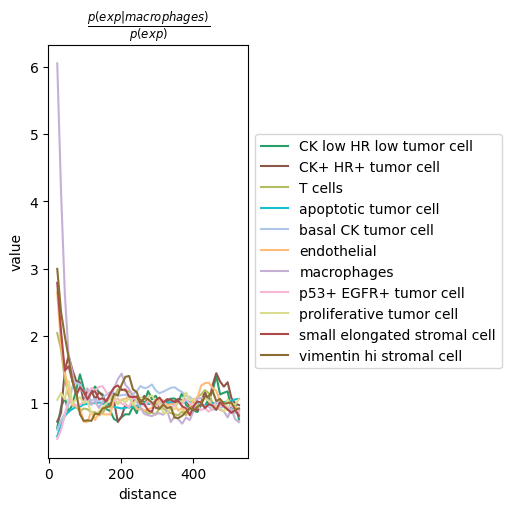

In [55]:
sq.pl.co_occurrence(adata, cluster_key="cell type", clusters="macrophages")

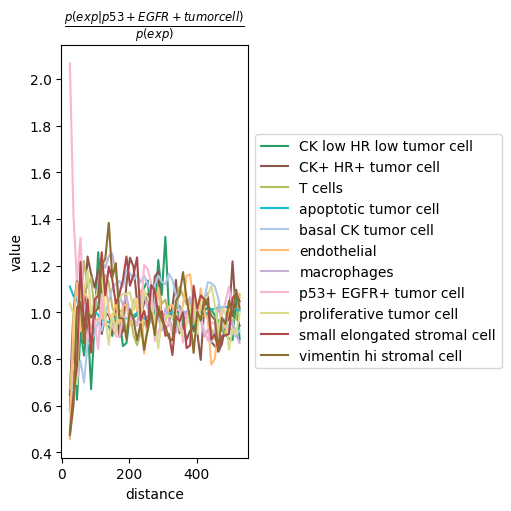

In [56]:
sq.pl.co_occurrence(adata, cluster_key="cell type", clusters="p53+ EGFR+ tumor cell")

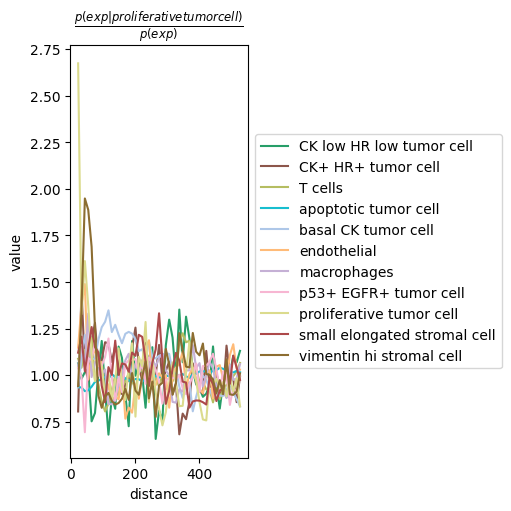

In [57]:
sq.pl.co_occurrence(adata, cluster_key="cell type", clusters="proliferative tumor cell")

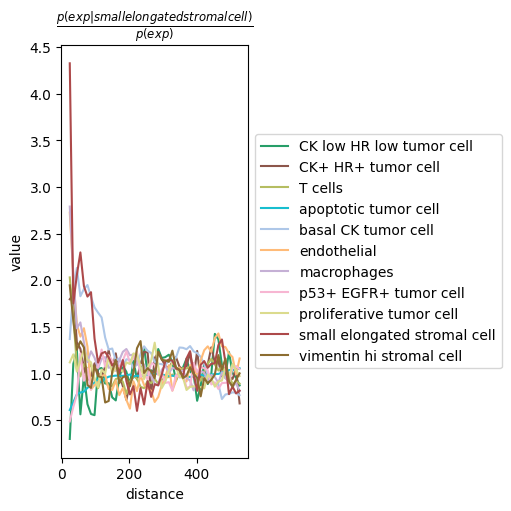

In [58]:
sq.pl.co_occurrence(adata, cluster_key="cell type", clusters="small elongated stromal cell")

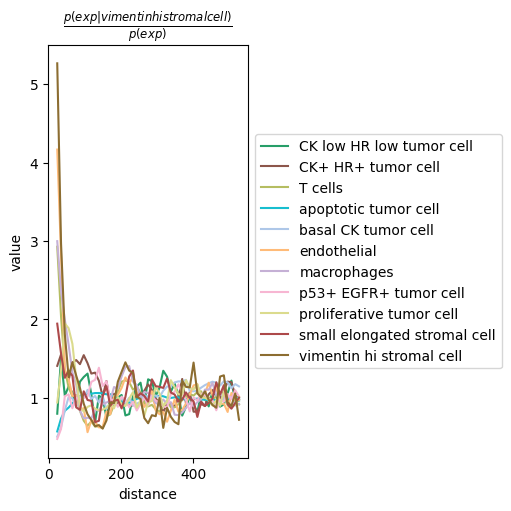

In [59]:
sq.pl.co_occurrence(adata, cluster_key="cell type", clusters="vimentin hi stromal cell")

In [60]:
sq.gr.spatial_neighbors(adata, delaunay=True, coord_type="generic")

/opt/miniconda3/envs/squidpy/lib/python3.8/site-packages/squidpy/pl/_spatial_utils.py:955: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


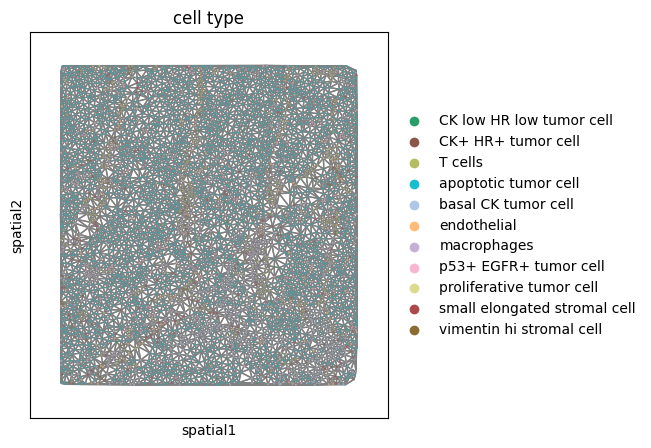

In [63]:
sq.pl.spatial_scatter(
    adata,
    shape=None,
    color="cell type",
    connectivity_key="spatial_connectivities",
    size=0.1,
)

We can further visualize tissue organization in spatial coordinates with
`squidpy.pl.spatial_scatter`.


/opt/miniconda3/envs/squidpy/lib/python3.8/site-packages/squidpy/pl/_spatial_utils.py:955: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


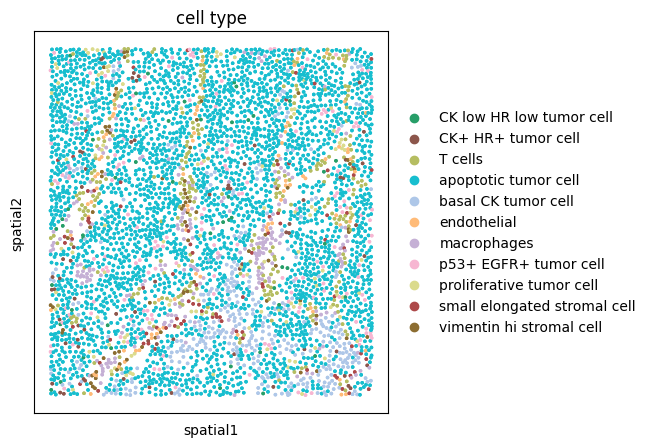

In [3]:
sq.pl.spatial_scatter(adata, color="cell type", size=10, shape=None)

In [45]:
df = pd.DataFrame(adata.obsm["spatial"], columns = ["x", "y"])

In [46]:
list(adata.obs["cell type"])

['apoptotic tumor cell',
 'apoptotic tumor cell',
 'p53+ EGFR+ tumor cell',
 'apoptotic tumor cell',
 'apoptotic tumor cell',
 'apoptotic tumor cell',
 'apoptotic tumor cell',
 'apoptotic tumor cell',
 'apoptotic tumor cell',
 'T cells',
 'macrophages',
 'apoptotic tumor cell',
 'apoptotic tumor cell',
 'basal CK tumor cell',
 'CK low HR low tumor cell',
 'endothelial',
 'apoptotic tumor cell',
 'p53+ EGFR+ tumor cell',
 'p53+ EGFR+ tumor cell',
 'apoptotic tumor cell',
 'apoptotic tumor cell',
 'basal CK tumor cell',
 'basal CK tumor cell',
 'CK low HR low tumor cell',
 'apoptotic tumor cell',
 'apoptotic tumor cell',
 'apoptotic tumor cell',
 'apoptotic tumor cell',
 'vimentin hi stromal cell',
 'p53+ EGFR+ tumor cell',
 'apoptotic tumor cell',
 'apoptotic tumor cell',
 'apoptotic tumor cell',
 'apoptotic tumor cell',
 'apoptotic tumor cell',
 'apoptotic tumor cell',
 'apoptotic tumor cell',
 'apoptotic tumor cell',
 'apoptotic tumor cell',
 'apoptotic tumor cell',
 'apoptotic tumor 

In [47]:
df["cluster"] = list(adata.obs["cell type"])

In [48]:
df

,x,y,cluster
0,1.709091,15.327273,apoptotic tumor cell
1,3.849462,42.075269,apoptotic tumor cell
2,0.866667,50.333333,p53+ EGFR+ tumor cell
3,1.388889,133.777778,apoptotic tumor cell
4,2.107143,199.660714,apoptotic tumor cell
...,...,...,...
4663,730.676471,624.588235,apoptotic tumor cell
4664,730.578947,631.894737,apoptotic tumor cell
4665,730.142857,636.964286,apoptotic tumor cell
4666,730.375000,658.041667,p53+ EGFR+ tumor cell


In [26]:
import pandas as pd

In [49]:
df[["x", "y", "cluster"]].to_csv("/Users/brendan/Desktop/PostDoc/work/HuBMAP/repos/multiscale_celltype_colocalization_analysis/data/squidpy/compute_co_occurance_data.csv")